<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_10_Ordinary_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10 - Ordinary Differential Equations

This notebook contains the code for the example problems found in Chapter 10.

**Example 10.1: Symbolic solution of ODE $dv/dt=a$ using SymPy**

In [ ]:
%reset -f

from sympy import Function, symbols, dsolve, Derivative as D

print('-'*28,'CODE OUTPUT','-'*29,'\n')

v = Function('v')
t, v0, a = symbols('t, v0, a',real=True)

# use dsolve to obtain the general solution
soln = dsolve(D(v(t), t)-a, v(t),simplify=True).rhs

print('General symbolic solution v(t) =',soln)

# solve again using dsolve, with initial conditions
initCondits = {v(0): v0}
soln = dsolve(D(v(t), t)-a, v(t),simplify=True,ics=initCondits).rhs

print('\nUsing initial conditions, the solution v(t) =',soln)

---------------------------- CODE OUTPUT ----------------------------- 

General symbolic solution v(t) = C1 + a*t

Using initial conditions, the solution v(t) = a*t + v0


**Example 10.2: Symbolic solution of ODE $x''(t)=a$ using SymPy**

---------------------------- CODE OUTPUT ----------------------------- 

The symbolic solution is x(t)= a*t**2/2 + t*v0 + x0


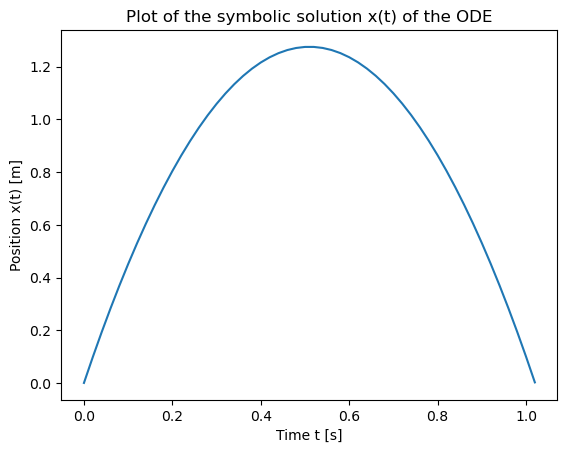

In [ ]:
%reset -f

from sympy import symbols, Function, lambdify, Derivative as D, dsolve
import numpy as np

import matplotlib.pyplot as plt

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define function x and various symbols
x = Function('x')
a, t, x0, v0 = symbols('a, t, x0, v0',real=True)

# initial conditions for ode are x(0)=x0 and v(0)=v0
initCondits = {x(0): x0, D(x(t),t).subs(t, 0): v0}

# use dsolve to find the solution with given initial conditions
soln = dsolve(D(x(t), t, t) -a, x(t),simplify=True,ics=initCondits).rhs
print('The symbolic solution is x(t)=',soln)

# make a numpy-ready function x(t) from the SymPy results
# using lamdify and substitute numerical values of a, x0, v0
xsoln = lambdify(t, soln.subs({a:-9.8, v0:5, x0:0}),'numpy')

# use the lambda function above to evaluate x(t) values from 0-1.03 s
xvals = np.arange(0,1.03,.02)
yvals = xsoln(xvals)

# plot values x(t)
plt.plot(xvals,yvals)
plt.xlabel('Time t [s]')
plt.ylabel('Position x(t) [m]')
plt.title('Plot of the symbolic solution x(t) of the ODE')
plt.show()

**Example 10.3: The general solution of first order linear ODEs**

In [ ]:
%reset -f

from sympy import symbols, Function, Derivative as D, dsolve

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define function y and various symbols
y = Function('y')
b, x = symbols('b, x',real=True)

# use dsolve to find the solution
soln = dsolve(D(y(x), x) +b* y(x)-1, y(x),simplify=True).rhs

print('The symbolic solution is y(x) =',soln)

---------------------------- CODE OUTPUT ----------------------------- 

The symbolic solution is y(x) = C1*exp(-b*x) + 1/b


**Example 10.4: The general symbolic solution of the SHO**

In [ ]:
%reset -f

from sympy import symbols, Function, Derivative as D, dsolve

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define function x and various symbols
x = Function('x')
k, m, t = symbols('k, m, t', real=True, positive=True)
x0, v0 = symbols('x0, v0', real=True)

soln = dsolve(m*D(x(t), t, t) +k*x(t), x(t),\
simplify=True).rhs
print('The symbolic solution is:\n', 'x(t) =')
print(soln)

initCondits = {x(0): x0, D(x(t),t).subs(t, 0): v0}

soln = dsolve(D(x(t), t, t) +(k/m)*x(t), x(t),\
simplify=True,ics=initCondits).rhs

print('\nThe solution with the initial conditions x(0)=x0, v(0)=v0 \
 is:', '\nx(t) =')
print(soln)

---------------------------- CODE OUTPUT ----------------------------- 

The symbolic solution is:
 x(t) =
C1*sin(sqrt(k)*t/sqrt(m)) + C2*cos(sqrt(k)*t/sqrt(m))

The solution with the initial conditions x(0)=x0, v(0)=v0  is: 
x(t) =
x0*cos(sqrt(k)*t/sqrt(m)) + sqrt(m)*v0*sin(sqrt(k)*t/sqrt(m))/sqrt(k)


**Example 10.5: The numerical solution of the ODE for simple pendulum**

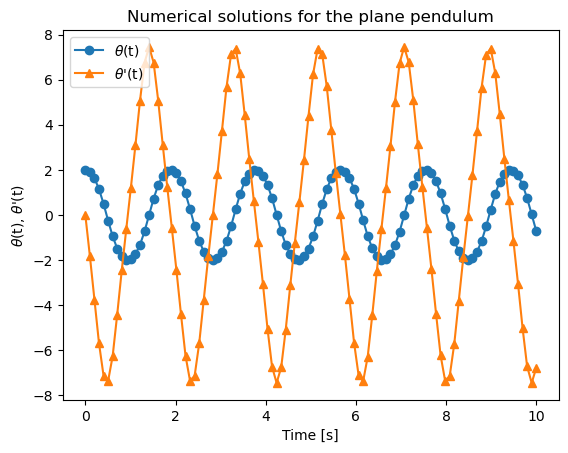

In [ ]:
%reset -f

from scipy.integrate import odeint

import numpy as np
import matplotlib.pyplot as plt

L = 0.5		# length of pendulum
g = 9.8		# gravitational acceleration

# function to define the ODE for pendulum
def deriv(y, time):
    return (y[1], - (g/L)* np.sin(y[0]))

# define times t
t = np.linspace(0, 10, 100)

# initial conidtions theta(0)=2 rad,  theta'(0)=0
yinit = (2, 0)

# solve numerically using scipy odeint() function
y = odeint(deriv, yinit, t)

# plot angle and anglar velocity as functions of time
plt.plot(t, y[:, 0], 'o-',label=r'$\theta$(t)')
plt.plot(t, y[:, 1], '^-',label=r"$\theta$'(t)")

plt.legend(loc='best')
plt.xlabel('Time [s]')
plt.ylabel(r"$\theta$(t), $\theta$'(t)")
plt.title('Numerical solutions for the plane pendulum')
plt.show()

**Example 10.6: The symbolic solution of the damped oscillator**

In [ ]:
%reset -f

from sympy import symbols, Function, Derivative as D, dsolve

import textwrap

# function to print long expression in the code output
def wrap(x,w):
    wrapper = textwrap.TextWrapper(width=w)
    lines = wrapper.wrap(text=str(x))
    for x in lines:
        print(x)

print('-'*28,'CODE OUTPUT','-'*29,'\n')

# define function x and various symbols
x = Function('x')
x0, v0 = symbols('x0, v0', real=True)
k, m, gamma, t ,omega, C1, C2 = symbols('k, m, gamma, t,\
omega, C1, C2', real=True, positive=True)

# overdamped and underdamped oscaillation
soln = dsolve(D(x(t), t, t)+2*gamma*D(x(t), t) +omega**2*x(t), x(t),\
   simplify=True).rhs

print('\nFor overdamped and underdamped oscillations the \
solution :\nx(t) =')
wrap(str(soln),63)

# critically damped oscillation:  gamma=omega
soln = dsolve(D(x(t), t, t)+2*omega*D(x(t), t) +omega**2*x(t), x(t),\
   simplify=True).rhs

print('\nFor critically damped oscillations, the symbolic \
solution is:\nx(t) =\n',str(soln))

---------------------------- CODE OUTPUT ----------------------------- 


For overdamped and underdamped oscillations the solution :
x(t) =
C1*exp(t*(-gamma + sqrt(gamma - omega)*sqrt(gamma + omega))) +
C2*exp(-t*(gamma + sqrt(gamma - omega)*sqrt(gamma + omega)))

For critically damped oscillations, the symbolic solution is:
x(t) =
 (C1 + C2*t)*exp(-omega*t)


**Example 10.7: Graphing the three types of  damped oscillations**

---------------------------- CODE OUTPUT ----------------------------- 



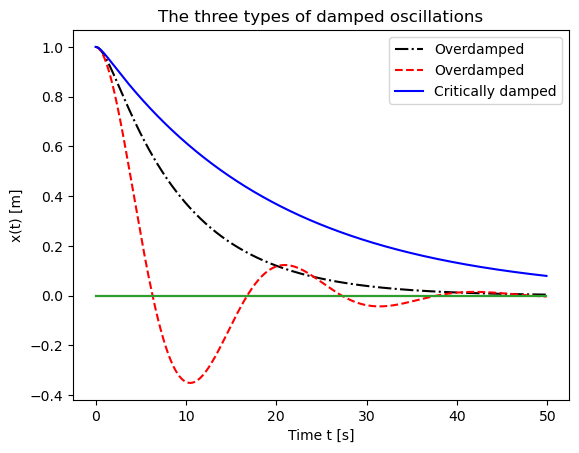

In [ ]:
%reset -f

from sympy import symbols, Function, Derivative as D, dsolve, lambdify

import numpy  as np
import matplotlib.pyplot as plt

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x = Function('x')
t = symbols('t',real=True,positive=True)

# function to plot the three solutions x(t) for given k, m, b
# and different markers and labels

def plotx(k, m, b, labl, mrker):
    # solve differential equation with initial conditions
    soln = dsolve(m*D(x(t), t, t)+b*D(x(t), t) +k*x(t),
      x(t),simplify=True,ics=initCondits).rhs

    # lambdify the solution to get a function x(t)
    xsoln = lambdify(t, soln,'numpy')

    # evaluate x(t) values from t=0 to t=50 s
    xvals = np.arange(0,50,.1)
    yvals = xsoln(xvals)

    # plot x(t) using different markers abnd labels
    plt.plot(xvals,yvals, mrker, label=labl);
    plt.plot(xvals,[0]*xvals)

# initial conditions x(0)=1  and v(0)=0
initCondits = {x(0): 1, D(x(t),t).subs(t, 0): 0}

# plot the solution x(t) for overdamped motion
k, m, b = .1, 1, 1
labl = 'Overdamped'
plotx(k,m,b,labl,'k-.')

# plot the solution x(t) for underdamped motion
b = .2
labl = 'Overdamped'
plotx(k,m,b,labl,'r--')

# plot the solution x(t) for critically damped motion
b = 2
labl = 'Critically damped'
plotx(k,m,b,labl,'b')

plt.title('The three types of damped oscillations')
plt.ylabel('x(t) [m]')
plt.xlabel('Time t [s]')
leg = plt.legend()
plt.show()

**Example 10.8: The symbolic solution of the ODE for a driven oscillation**

---------------------------- CODE OUTPUT ----------------------------- 

The analytical solution is complicated!
x(t) =
C1*exp(t*(-gm + sqrt(gm - wo)*sqrt(gm + wo))) +
C2*exp(-t*(gm + sqrt(gm - wo)*sqrt(gm + wo))) +
2*F*gm*w*sin(t*w)/(4*gm**2*w**2 + w**4 - 2*w**2*wo**2 +
wo**4) - F*w**2*cos(t*w)/(4*gm**2*w**2 + w**4 - 2*w**2*wo**2
+ wo**4) + F*wo**2*cos(t*w)/(4*gm**2*w**2 + w**4 -
2*w**2*wo**2 + wo**4)


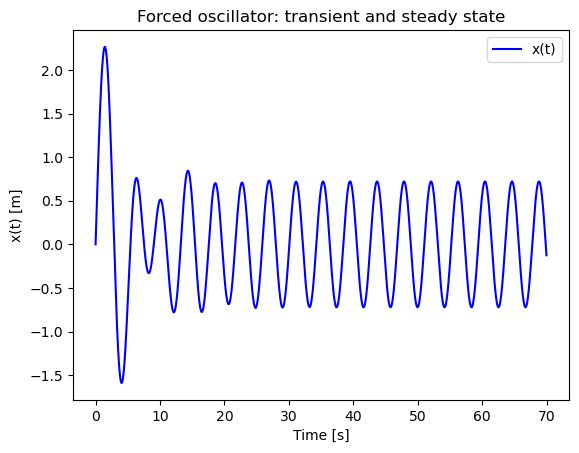

In [ ]:
%reset -f

from sympy import symbols, Function, solve, Derivative as D,\
    dsolve, lambdify, sin, cos, trigsimp, simplify

import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import textwrap

# function to print long expression in the code output
def wrap(x,w):
    wrapper = textwrap.TextWrapper(width=w)
    lines = wrapper.wrap(text=str(x))
    for x in lines:
        print(x)

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x = Function('x')
C1, C2 = symbols('C1,C2')
t, F, w, wo, gm  = symbols('t, F, w, wo, gm ',real=True,\
positive=True)


# initial conditions x(0)=1  and v(0)=0
initCondits = {x(0): 1, D(x(t),t).subs(t, 0): 0}

soln = dsolve(D(x(t), t, t)+2*gm*D(x(t), t) +wo**2*x(t)-F*cos(w*t),
  x(t),simplify=True).rhs

print('The analytical solution is complicated!')
print('x(t) =')
wrap(soln,60)

# substitute numerical values for the parameters
u1 = soln.subs({F:1,w:1.5,wo:1,gm:.2,t:0})

u2 = soln.subs({F:1,w:1.5,wo:1,gm:.2,t:1})

C1C2 = solve([u1, u2-2],(C1,C2))

u = soln.subs({F:1,w:1.5,wo:1,gm:.2}).subs(C1C2)

xsoln = lambdify(t, u,'numpy')

# evaluate x(t) values from t=0 to t=70 s
xvals = np.arange(0,70,.02)
yvals = xsoln(xvals)

# plot x(t) using different markers abnd labels
plt.plot(xvals,yvals,'b',label='x(t)')
plt.xlabel('Time [s]')
plt.ylabel('x(t) [m]')
plt.title('Forced oscillator: transient and steady state')
leg = plt.legend()
plt.show()

**Example 10.9: The numerical solution of ODE for driven oscillation**

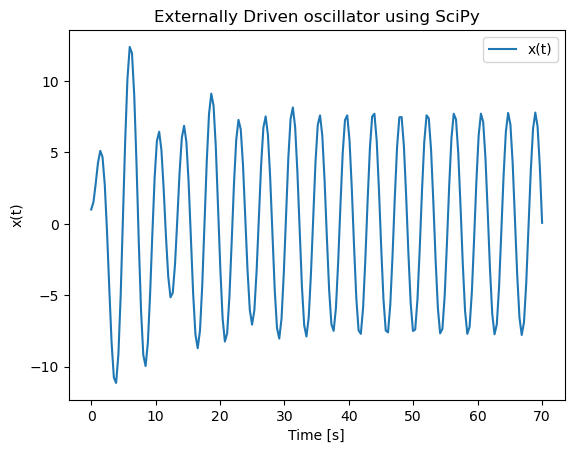

In [ ]:
%reset -f

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# SI values of mass, spring constant, force amplitude
b ,m, k, Fo, om = 0.2,1,1,10, 1.5

def deriv(y, time):
    return (y[1], -(b/m)*y[1]- (k/m)*y[0]+Fo/m* np.cos(om*time))

t = np.linspace(0, 70, 200)
yinit = (1, 0)

soln = odeint(deriv, yinit, t)

plt.plot(t, soln[:, 0], '-',label=r'x(t)')
plt.ylabel('x(t)')
plt.xlabel('Time [s]')
plt.title('Externally Driven oscillator using SciPy')
leg = plt.legend()
plt.show()

**Example 10.10: The amplitude $A$ as a function of the external frequency**

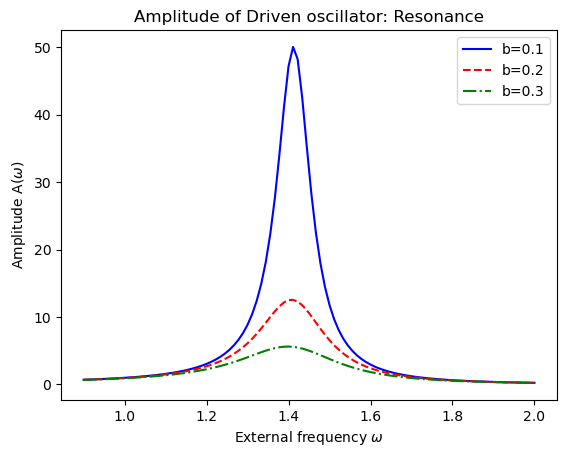

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

# SI values of mass, spring constant, force amplitude
m, k, Fo = 1, 1, 1

# natural frequency (undamped oscillation)
omega0 = np.sqrt(k/m)

# function to evaluate the amlitude for different (omega,b) values
def ampl(omega,b):
    gamma=b/(2*m)
    return (Fo/m)/((omega0*2-omega**2)**2+4*(gamma**2)*(omega**2))

omega = np.linspace(0.9,2,100)

# 3 plots for different values of b
plt.plot(omega,ampl(omega,.1),'b',label=r'b=0.1')
plt.plot(omega,ampl(omega,.2),'r--',label=r'b=0.2')
plt.plot(omega,ampl(omega,.3),'g-.',label=r'b=0.3')

plt.ylabel(r'Amplitude A($\omega$)')
plt.xlabel(r'External frequency $\omega$')
plt.title('Amplitude of Driven oscillator: Resonance')
leg = plt.legend()
plt.show()

**Example 10.11: The principle of linear superposition**

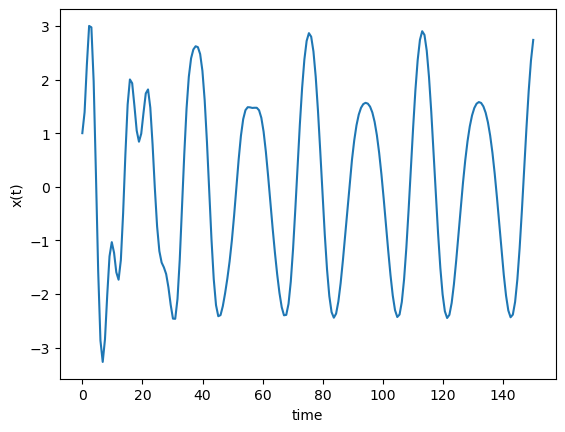

In [ ]:
%reset -f

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

m, gm, omega0, F1, F2 = 1.0, 0.1, 1.0, 0.5, 2.0
om1 = omega0/2
om2 = omega0/3

def deriv(y, t):
    return (y[1],-gm*y[1] - omega0**2*y[0] + \
            F1/m*np.cos(om1*t) + F2/m*np.cos(om2*t) )

time = np.linspace(0,150,200)
yint = (1,0)
soln = odeint(deriv,yint,time)

plt.plot(time, soln[:,0])
plt.xlabel('time')
plt.ylabel('x(t)')
plt.show()

**Example 10.12: Phase space diagrams of damped oscillators**

---------------------------- CODE OUTPUT ----------------------------- 



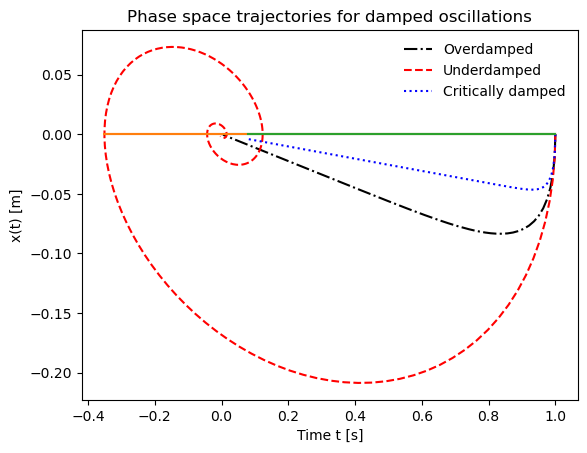

In [ ]:
%reset -f

from sympy import symbols, Function, Derivative as D, dsolve, \
   lambdify, diff

import numpy  as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x = Function('x')
t = symbols('t',real=True,positive=True)

# function to plot the three phase spaces for given k, m, b

def plotx(k, m, b, labl, mrker):
    # solve differential equation with initial conditions
    soln = dsolve(m*D(x(t), t, t)+b*D(x(t), t) +k*x(t),
      x(t),simplify=True,ics=initCondits).rhs

    # lambdify the solution to get a function x(t), x'(t)
    xsoln = lambdify(t, soln,'numpy')
    dersoln = lambdify(t, diff(soln,t),'numpy')

    # evaluate x(t), x'(t) values from t=0 to t=50 s
    tvals = np.arange(0,50,.2)
    xvals = xsoln(tvals)
    yvals = dersoln(tvals)

    # plot x(t) using different markers abnd labels
    plt.plot(xvals,yvals, mrker, label=labl);
    plt.plot(xvals,[0]*xvals)

# initial conditions x(0)=1  and v(0)=0
initCondits = {x(0): 1, D(x(t),t).subs(t, 0): 0}

k, m, b = .1, 1, 1        # trajectory for overdamped motion
labl = 'Overdamped'
plotx(k,m,b,labl,'k-.')

b = .2    				# trajectory for underdamped motion
labl='Underdamped'
plotx(k,m,b,labl,'r--')

b = 2
labl = 'Critically damped'  # trajectory for Critically damped
plotx(k,m,b,labl,'b:')

plt.title('Phase space trajectories for damped oscillations');
plt.ylabel('x(t) [m]')
plt.xlabel('Time t [s]')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.show()

**Example 10.13: The symbolic solution of a system of ODEs**

---------------------------- CODE OUTPUT ----------------------------- 

x1(t) = sin(om*t)/(2*om) - sqrt(3)*sin(sqrt(3)*om*t)/(6*om)
x2(t) = sin(om*t)/(2*om) + sqrt(3)*sin(sqrt(3)*om*t)/(6*om)

x1(t)+x2(t) = sin(om*t)/om
x1(t)-x2(t) = -sqrt(3)*sin(sqrt(3)*om*t)/(3*om)


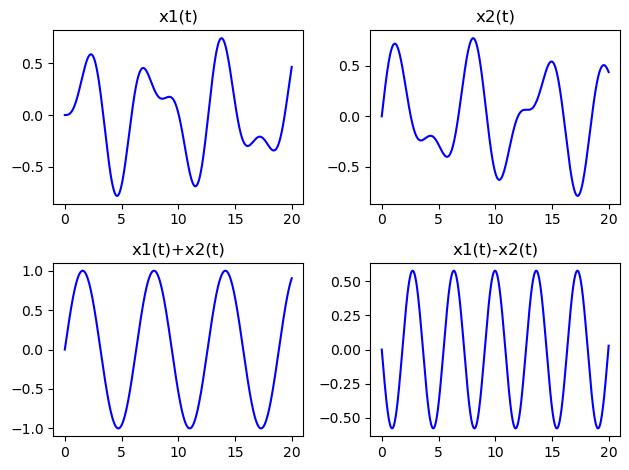

In [ ]:
%reset -f

from sympy import Function,  Eq, Derivative as D, symbols, lambdify

from sympy.solvers.ode.systems import dsolve_system

import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')

k, m, t, om, x0, v0 = symbols('k, m, t, om, x0, v0',real=True,\
positive=True)

x1, x2 = symbols('x1, x2', cls=Function)

# function to plot x1,x2 etc
def plotx(y,ttle):
    plt.plot(xvals,y,'b');
    plt.title(ttle);

# Neton's law for the two masses
eq1 = Eq(D(x1(t),t,t), -om**2*x1(t)-om**2*(x1(t)-x2(t)))
eq2 = Eq(D(x2(t),t,t), -om**2*x2(t)-om**2*(x2(t)-x1(t)))

# initial conditions x1(0)=0, v1(0)=0, x2(0)=0  and v2(0)=1
initCondits = {x1(0): 0, D(x1(t),t).subs(t, 0): 0,\
               x2(0): 0, D(x2(t),t).subs(t, 0): 1 }

# solve the system of two differential equations symbolically
soln = dsolve_system((eq1, eq2), [x1(t),x2(t)], t, initCondits)

# extract the solutions x1(t) and x2(t), print x1, x2, x1+x2, x1-x2
X1 = soln[0][0].rhs
X2 = soln[0][1].rhs

print('x1(t) =',X1)
print('x2(t) =',X2)
print('\nx1(t)+x2(t) =',X1+X2)
print('x1(t)-x2(t) =',X1-X2)

# make x1(t) and x2(t) functions using lambdify, and insert omega=om=1
x1soln = lambdify(t, X1.subs(om,1),'numpy')
x2soln = lambdify(t, X2.subs(om,1),'numpy')

# evaluate x(t) values from t=0 to t=20 s
xvals = np.arange(0,20,.02)

# craete 4 plot panels for x1, x2, x1+x2 and x1-x2
plt.subplot(2,2,1)
plotx(x1soln(xvals),'x1(t)')
plt.subplot(2,2,2)
plotx(x2soln(xvals),'x2(t)')
plt.subplot(2,2,3)
plotx(x1soln(xvals)+x2soln(xvals),'x1(t)+x2(t)')
plt.subplot(2,2,4)
plotx(x1soln(xvals)-x2soln(xvals),'x1(t)-x2(t)')

plt.tight_layout()
plt.show()

**Example 10.14: The numerical solution to a system of ODEs**

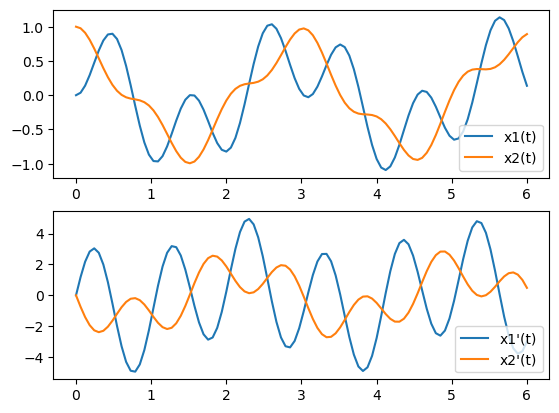

In [ ]:
%reset -f

from scipy.integrate import odeint

import numpy as np
import matplotlib.pyplot as plt

# function defines the differential equations
# Y[0]=x1, Y[1]=x1', Y[2]=x2, Y[3]=x2'

def deriv(Y,t):
    return np.array([ Y[1], (- k1 * Y[0] + k2 * (Y[2] - Y[0] )) / m1,
                      Y[3], (- k3 * Y[2] + k2 * (Y[0] - Y[2] )) / m2])

# t= array of times to be evaluated
t = np.linspace(0,6,100)

# spring constants and masses
k1, k2, k3 = 10, 20, 5
m1, m2 = 1, 2

# yinit = initial conditions [x1(0), x1'(0), x2(0), x2'(0)
yinit = np.array([0, 0, 1, 0])

# solve the odes using odeint
Y = odeint(deriv, yinit, t)

# plot x1(t), x2(t)
plt.subplot(2,1,1)
plt.plot(t,Y[:,0],label='x1(t)')
plt.plot(t,Y[:,2],label='x2(t)')
plt.legend(loc='lower right')

# plot x1'(t), x2'(t)
plt.subplot(2,1,2)
plt.plot(t,Y[:,1],label="x1'(t)")
plt.plot(t,Y[:,3],label="x2'(t)")

plt.legend(loc='lower right')
plt.show()

**Example 10.15: Legendre polynomials**

---------------------------- CODE OUTPUT ----------------------------- 

The first few Legendre polynomials are:

P_0 = 1
P_1 = x
P_2 = 3*x**2/2 - 1/2
P_3 = 5*x**3/2 - 3*x/2
P_4 = 35*x**4/8 - 15*x**2/4 + 3/8
P_5 = 63*x**5/8 - 35*x**3/4 + 15*x/8

The left hand side =  693*x**6/8 - 945*x**4/8 + 315*x**2/8 - 15/8

The right hand side =  693*x**6/8 - 945*x**4/8 + 315*x**2/8 - 15/8

The identity is   True


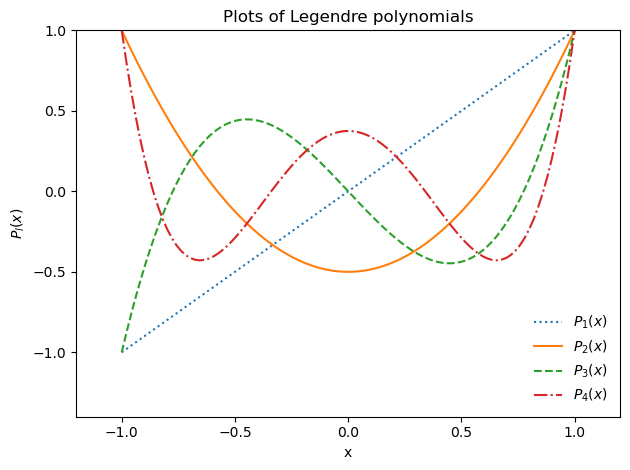

In [ ]:
%reset -f

import numpy as np
from scipy.special import eval_legendre
from sympy import legendre, Symbol
import matplotlib.pyplot as plt

print('-'*28,'CODE OUTPUT','-'*29,'\n')

x = Symbol('x')

print('The first few Legendre polynomials are:\n')
for l in range(0,6):
    print('P_'+str(l)+' =', legendre(l,x))

l = 6

lhs = l*legendre(l,x)
print('\nThe left hand side = ',lhs.expand())

rhs = (2*l-1)* x * legendre(l-1,x)-(l-1)*legendre(l-2,x)
print('\nThe right hand side = ',rhs.expand())

print('\nThe identity is  ',lhs.expand() == rhs.expand())

xc = np.linspace(-1, 1, 100)  # x-values between -1 and +1

s=['.',':','-','--','-.']
for j in range(1, 5):
    plt.plot(xc, eval_legendre(j, xc), str(s[j]),label=r'$P_{}(x)$'.format(j))

plt.title("Plots of Legendre polynomials")
plt.xlabel("x")
plt.ylabel(r'$P_l(x)$')
plt.ylim(-1.4,1);
plt.xlim(-1.2,1.2);
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()
plt.show()

**Example 10.16: Associated Legendre functions**

---------------------------- CODE OUTPUT ----------------------------- 


l = 0
P(0, 0 ) =  1

l = 1
P(1, -1 ) =  sqrt(1 - x**2)/2
P(1, 0 ) =  x
P(1, 1 ) =  -sqrt(1 - x**2)

l = 2
P(2, -2 ) =  1/8 - x**2/8
P(2, -1 ) =  x*sqrt(1 - x**2)/2
P(2, 0 ) =  3*x**2/2 - 1/2
P(2, 1 ) =  -3*x*sqrt(1 - x**2)
P(2, 2 ) =  3 - 3*x**2


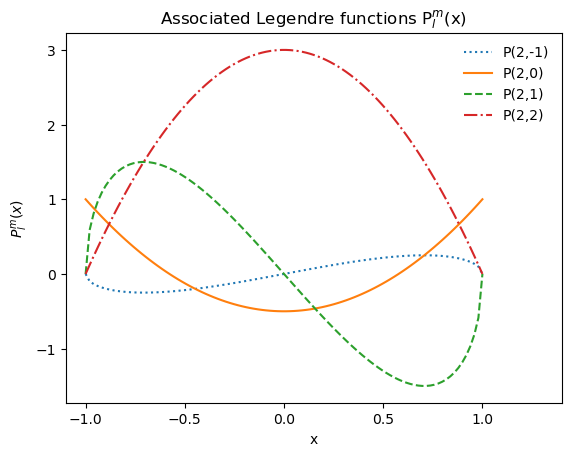

In [ ]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

print('-'*28,'CODE OUTPUT','-'*29,'\n')

from sympy import assoc_legendre, symbols
from scipy.special import lpmv

x = symbols('x')

print('\nl = 0')
l = 0
m =[ 0]
for i in range(len(m)):
    fn = assoc_legendre(l,m[i],x)
    print('P(0,',m[i],') = ',fn)

print('\nl = 1')
l = 1
m = [-1,0,1]

for i in range(len(m)):
    fn = assoc_legendre(l,m[i],x)
    print('P(1,',m[i],') = ',fn)

print('\nl = 2')
l = 2
m = [-2,-1,0,1,2]

for i in range(len(m)):
    fn = assoc_legendre(l,m[i],x)
    print('P(2,',m[i],') = ',fn)

xc = np.linspace(-1, 1, 100)  # x-values between -1 and +1

# define different markers for line plots
s = ['.',':','-','--','-.']

for j in range(1, 5):
    plt.plot(xc, lpmv(m[j],l, xc), str(s[j]),label='P(2,'+str(m[j])+')')

plt.title(r"Associated Legendre functions P$_l^m$(x)")
plt.xlabel("x")
plt.ylabel(r'$P_l^m(x)$')
plt.xlim(-1.1,1.4);

leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

plt.show()

**Example 10.17: Polar plots of associated Legendre polynomials**

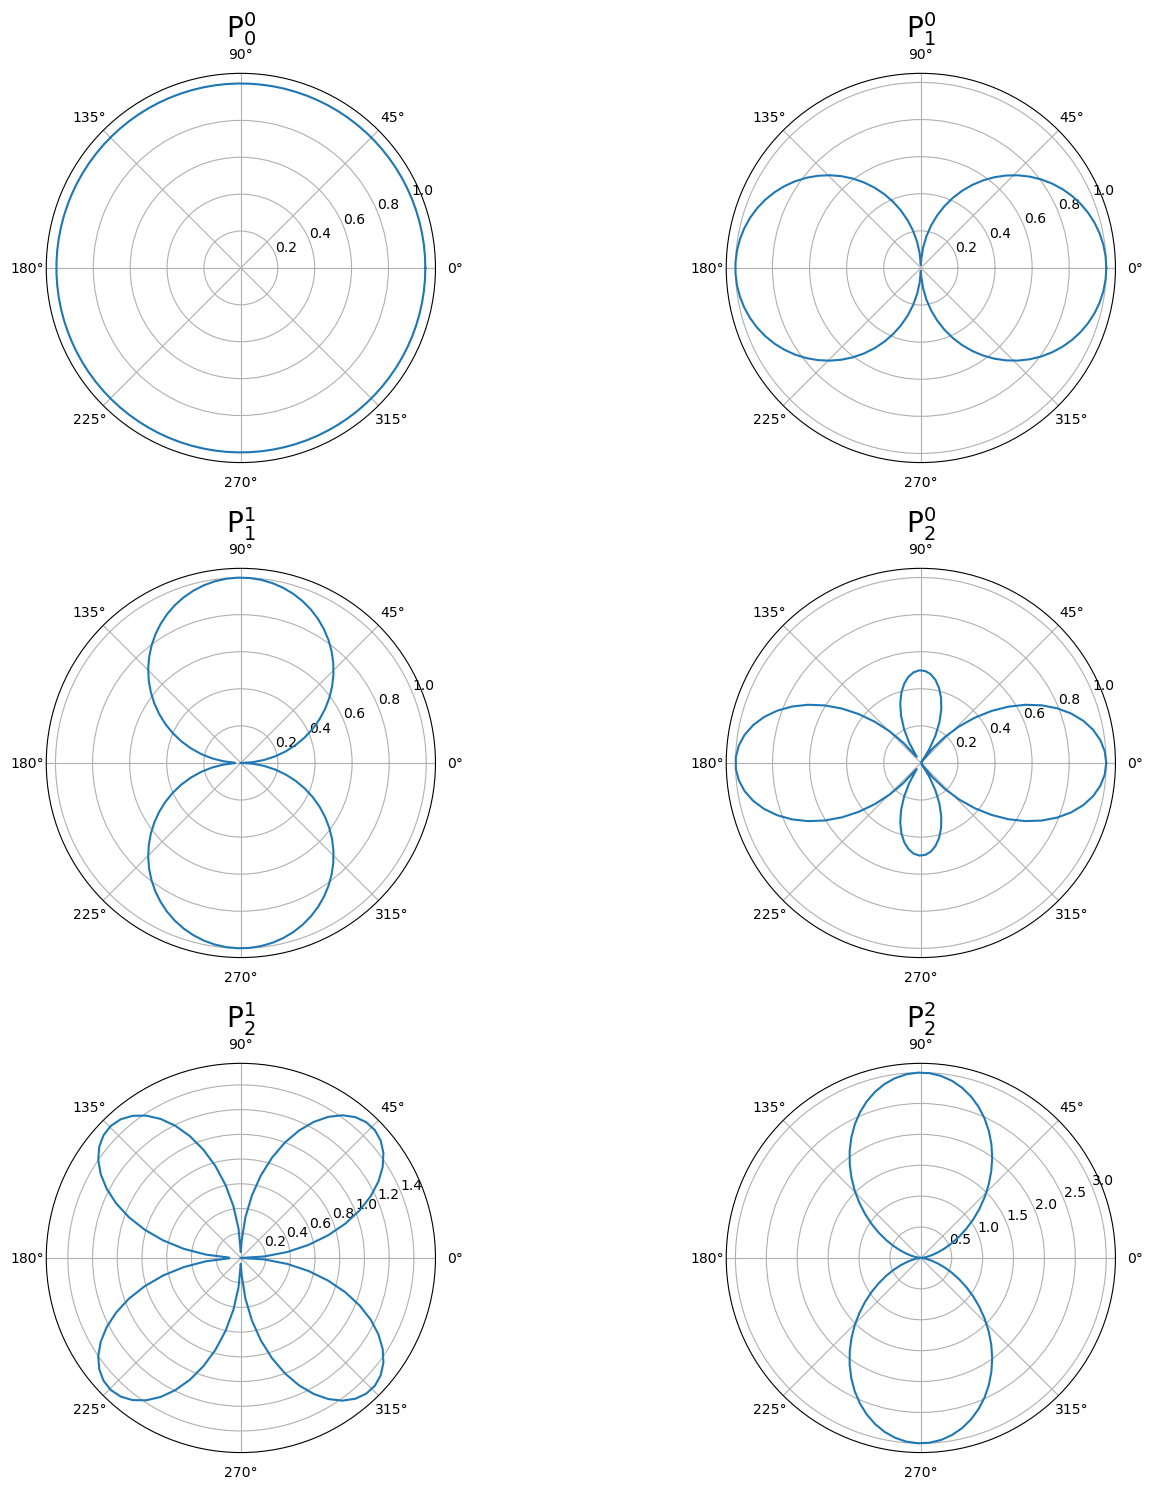

In [ ]:
%reset -f

from sympy import symbols, lambdify, cos
from sympy.functions.special.polynomials import assoc_legendre
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lpmv

theta = np.linspace(0,2*np.pi,100)
p00 = abs(lpmv(0,0,np.cos(theta)))
p10 = abs(lpmv(0,1,np.cos(theta)))
p11 = abs(lpmv(1,1,np.cos(theta)))
p20 = abs(lpmv(0,2,np.cos(theta)))
p21 = abs(lpmv(1,2,np.cos(theta)))
p22 = abs(lpmv(2,2,np.cos(theta)))

fig, axs =  plt.subplots(3, 2, subplot_kw=dict(projection='polar'), figsize=(15,15))
axs[0,0].plot(theta,p00)
axs[0,0].set_title('P$_0^0$', fontsize=20)

axs[0,1].plot(theta,p10)
axs[0,1].set_title('P$_1^0$', fontsize=20)

axs[1,0].plot(theta,p11)
axs[1,0].set_title('P$_1^1$', fontsize=20)

axs[1,1].plot(theta,p20)
axs[1,1].set_title('P$_2^0$', fontsize=20)

axs[2,0].plot(theta,p21)
axs[2,0].set_title('P$_2^1$', fontsize=20)

axs[2,1].plot(theta,p22)
axs[2,1].set_title('P$_2^2$', fontsize=20)
fig.tight_layout()
plt.show()

**Example 10.18: Bessel functions**

---------------------------- CODE OUTPUT ----------------------------- 

The general solution of the Bessel ODE is:

Eq(y(x), C1*besselj(p, K*x) + C2*bessely(p, K*x))


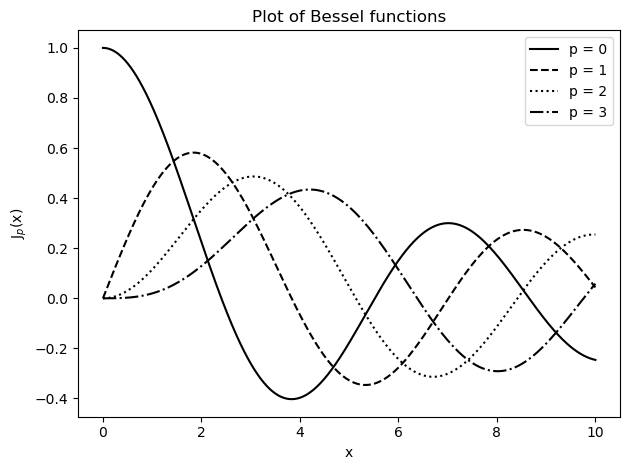

In [ ]:
%reset -f

from scipy.special import jv

import matplotlib.pyplot as plt

import numpy as np
from sympy import dsolve, Symbol, symbols, Function, diff

y = Function('y')
x, K = symbols('x, K')
p = Symbol('p', positive=True)

# The general form of Bessel ODE
ode = x**2*y(x).diff(x,x)+x*y(x).diff(x)+(K**2*x**2-p**2)*y(x)
soln = dsolve(ode)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The general solution of the Bessel ODE is:\n')
print( soln)

# plot the Bessel functions for p=0,1,2,3
xs = np.linspace(0,10,1000)

plt.plot(xs, jv(0,xs), 'k', label = 'p = 0')
plt.plot(xs, jv(1,xs), 'k--', label = 'p = 1')
plt.plot(xs, jv(2,xs), 'k:', label = 'p = 2')
plt.plot(xs, jv(3,xs), 'k-.', label = 'p = 3')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'J$_p$(x)')
plt.title('Plot of Bessel functions')
plt.tight_layout()
plt.show()

**Example 10.19: Properties of the Bessel functions**

In [ ]:
%reset -f

from sympy import  besselj, simplify, symbols, diff
x, p = symbols('x, p')

print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('J(0,x)+J(2,x) =',((besselj(0,x)+besselj(2,x)).simplify()))

print("\nJ'(0,x) = ",diff(besselj(0,x)))

print("\nJ'(p,x) = ",diff(besselj(p,x),x))

ident1=(besselj(0,x)-besselj(2,x))==2*diff(besselj(1,x))
print("\nThe identity    J(0,x) - J(2,x) = 2 . J'(1,x) is:  ", ident1)

---------------------------- CODE OUTPUT ----------------------------- 

J(0,x)+J(2,x) = 2*besselj(1, x)/x

J'(0,x) =  -besselj(1, x)

J'(p,x) =  besselj(p - 1, x)/2 - besselj(p + 1, x)/2

The identity    J(0,x) - J(2,x) = 2 . J'(1,x) is:   True


**Example 10.20: Zeros of the Bessel Functions**

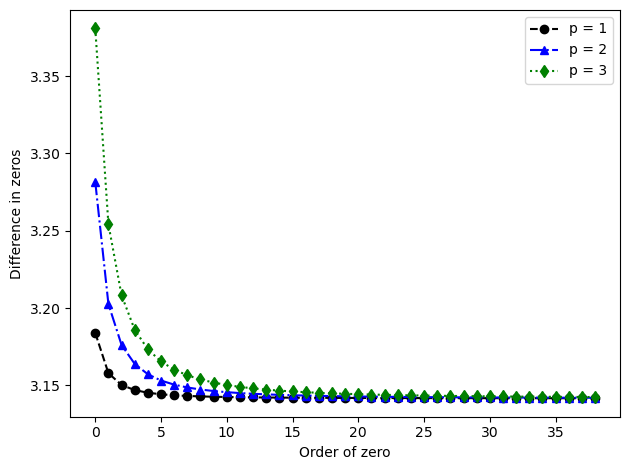

In [ ]:
%reset -f

from scipy.special import jn_zeros
import numpy as np

import matplotlib.pyplot as plt

zeros_1 = jn_zeros(1,40)
zeros_2 = jn_zeros(2,40)
zeros_3 = jn_zeros(3,40)

diff_zeros_1 = np.diff(zeros_1)
diff_zeros_2 = np.diff(zeros_2)
diff_zeros_3 = np.diff(zeros_3)

plt.plot(range(0,39),diff_zeros_1, 'ko--', label='p = 1')
plt.plot(range(0,39),diff_zeros_2, 'b^-.', label='p = 2')
plt.plot(range(0,39),diff_zeros_3, 'gd:', label='p = 3')
plt.legend()
plt.ylabel('Difference in zeros')
plt.xlabel('Order of zero')
plt.tight_layout()
plt.show()